<a href="https://colab.research.google.com/github/chanseongparkk/2022_Data_Analysis_Intern_practice/blob/main/07_11_04_%EB%8B%A4%EB%B3%80%EB%9F%89%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%83%90%EC%83%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. 상관분석

* cov(): 결측값을 제외한 쌍별 공분산을 구하는 메소드
* DataFrame.cov(min_periods = None, ddof = 10)
* corr(): 각 열 사이의 상관계수를 반환하는 메소드
* DataFrame.corr(method = "prearson", min_periods = 1)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# os에 따른 font 깨짐 제거를 위해 font 지정

import os

if os.name == "nt":
    font_family = "Malgun Gothic"
else: #mac os
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정

sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

In [ ]:
### 데이터셋 준비

from sklearn.datasets import load_iris

iris = load_iris()

columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# 데이터 생성 및 준비

data = pd.DataFrame(iris.data, columns = columns)
sy = pd.Series(iris.target, dtype = "category")
sy = sy.cat.rename_categories(iris.target_names)
data["species"] = sy

# 필터명 정의

cols = iris.feature_names

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# 공분산 산출
# 공분산은 수치적인 의미보다 패턴 확인에 중점
df_cov = data.cov()
df_cov

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.042434,1.274315,0.516271
sepal_width,-0.042434,0.189979,-0.329656,-0.121639
petal_length,1.274315,-0.329656,3.116278,1.295609
petal_width,0.516271,-0.121639,1.295609,0.581006


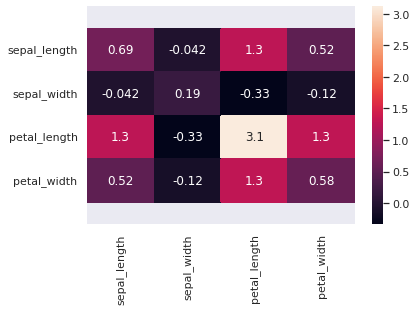

In [ ]:
# 공분산 히트맵 작성
# 공분산은 선형적인 관계를 측정하기 때문에 두 변수가 비선형적으로 함게 변하는 경우는 잘 측정하지 못함
ax = sns.heatmap(df_cov, annot = True)
ylim = ax.get_ylim() #y축 범위
ax.set_ylim(ylim[0]+0.5, ylim[1]-0.5)
plt.show()

In [ ]:
# 상관계수 계산

cor_mat = data.corr()
cor_mat

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


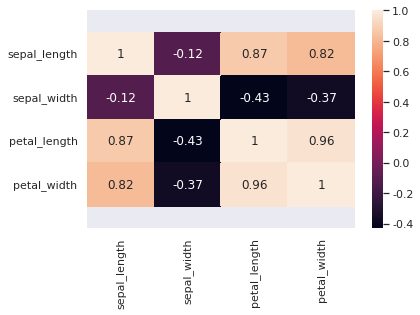

In [ ]:
# 상관관계 히트맵 작성
ax = sns.heatmap(cor_mat, annot = True)
ylim = ax.get_ylim() #y축 범위
ax.set_ylim(ylim[0]+0.5, ylim[1]-0.5)
plt.show()

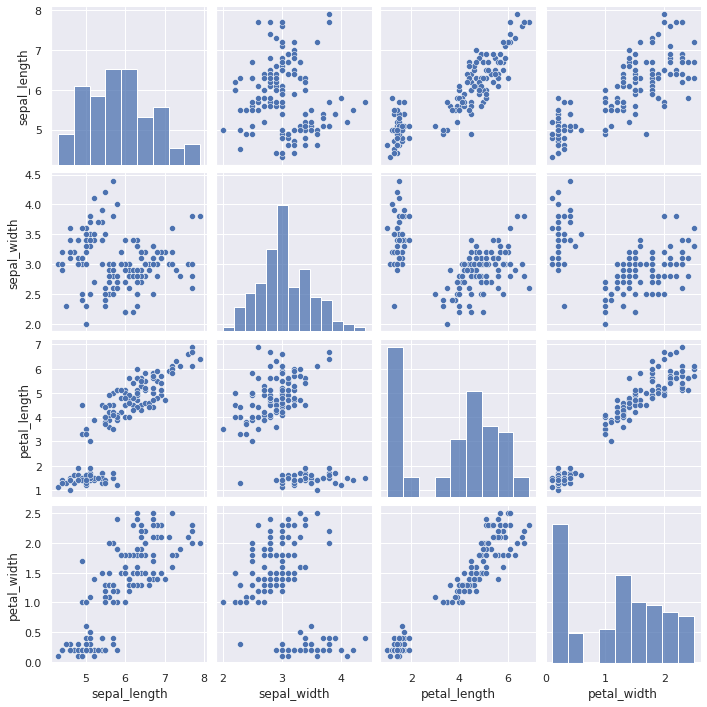

In [ ]:
# 산점도 행렬

sns.pairplot(data,diag_kind = "hist")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


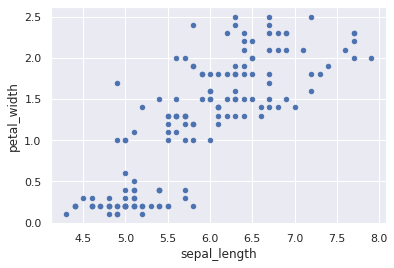

In [ ]:
# 산점도

data.plot(kind = "scatter", x = "sepal_length", y = "petal_width")
plt.show()

In [ ]:
# 상관계수 유의성 검정

import scipy.stats as sp

corr_value, pval = sp.pearsonr(data.sepal_length, data.petal_width)

print("상관계수 : ", corr_value)
print("p_value : ", format(pval, ".55f"))

# 유의수준 5% 이내에서 유의미하며 상관관계가 있다는 대립가설을 채택한다.

상관계수 :  0.8179411262715756
p_value :  0.0000000000000000000000000000000000002325498079793272196


### 2. 교차표 검정

* crosstab(): 교차표 생성 함수
* scipy 모듈의 chi2_contingency(): 2개의 범주형 변수에 대한 카이제곱 통계량 계산

In [ ]:
cross_data = pd.DataFrame(
                {'영양제':['복용','복용','복용','복용','복용','복용','복용','복용',
                           '복용','복용','복용','복용','복용','복용','복용','복용',
                            '복용','복용','복용','복용',
                            '미복용','미복용','미복용','미복용','미복용','미복용',
                            '미복용','미복용','미복용','미복용','미복용','미복용',
                            '미복용','미복용','미복용','미복용','미복용','미복용',
                            '미복용', '미복용'],
                  '감기여부':['유','유','유','유','유','무','무','무','무','무',
                              '무','무','무','무','무','무','무','무','무','무',
                              '유','유','유','유','유','유','유','유','유','유',
                              '유','유','무','무','무','무','무','무','무','무']
                 }
)

cross_data.head()

,영양제,감기여부
0,복용,유
1,복용,유
2,복용,유
3,복용,유
4,복용,유


In [ ]:
# 교차분석표 생성

display(pd.crosstab(cross_data.영양제, cross_data.감기여부, margins = True))

# 계산하기 위한 교차표

data_crosstab = pd.crosstab(cross_data.영양제, cross_data.감기여부, margins = False)

data_crosstab

감기여부,무,유,All
영양제,,,
미복용,8,12,20
복용,15,5,20
All,23,17,40


감기여부,무,유
영양제,,
미복용,8,12
복용,15,5


In [ ]:
# 교차표 분석
from scipy.stats import chi2_contingency

# correction = True를 적용하면 Yates' correction이 적용되어 검정통계량이 보수적으로 더 낮게 나옴

result = chi2_contingency(observed = data_crosstab, correction = False)
print("1. 카이제곱통계량 : ", result[0])
print("2. p_value : ", result[1])
print("3. df(자유도) : ", result[2])
print("4.  기대값 행렬 ")
pd.DataFrame(result[3]).rename(index = {0: "복용", 1: "미복용"}, columns = {0: "유", 1: "무"})

1. 카이제곱통계량 :  5.012787723785166
2. p_value :  0.025160759200408785
3. df(자유도) :  1
4.  기대값 행렬 


,유,무
복용,11.5,8.5
미복용,11.5,8.5
